There is this concept called exploratory data analysis (EDA) which is important in machine learning. In this beginner friendly blog, we will solely discuss EDA.

So what is exploratory data analysis or EDA? Well, it is the process of analyzing data in order to make sense of it and come up with a summary that describes the data using different methods like data manipulation and visualization. In other words, EDA is a way of describing and understanding the data beyond the values in rows and columns in the tables. 

The next question would be, how is it related to machine learning? As we have explained in [this post](https://semasuka.github.io/blog/2018/12/17/why-deep-learning-now.html), for a machine learning model to make accurate predictions, it needs to be trained using clean data but since we ain't living in a perfect world, most of the datasets are dirty/incomplete and need to be prepared before being used. That's when libraries like pandas, matplotlib and seaborn come in handy.

It is also true that most data scientists spend most of their time cleaning, organizing and visualizing data (unless when they are working in a team with data analysts and data engineers). This shows how EDA is a desirable skill for a machine learning engineer and data scientist.


![data scientist time](/blog/assets/post_cont_image/ds_time.jpg)

picture credit: [forbes](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/#3927c8336f63)

With no further delay, let's jump into code.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Fist we are importing the necessary libraries and let me explain what each library does:
* Numpy is a library that applies scientific computation on arrays (think of an array as a list in python) and will be referring to it using the variable name np (There is also an upcoming post entirely dedicated to numpy).
* Pandas for data manipulation and will be referring to it using the variable name pd (There is also an upcoming post entirely dedicated to pandas so stay tuned!).
* Matplotlib.pyplot which is a data visualization library created after the popular  Matlab's visualizations.
* Seaborn is based on matplotlib and its plots (graphs) are prettier than those in matplotlib.
* We are also importing the warning module in order to turn off the warnings notification.

Note: Seaborn and Matplotlib complement each other and should be used together in order to come up with great plots because there are some functions present in Matplotlib that are not present in Seaborn and vice versa.

### Data manipulation

The dataset we are going to use in this post is about different statistics of all the countries in the world, the reason why we choose this dataset among all is that it is easy to understand and doesn't require any domain knowledge at all. This makes this dataset perfect for both beginners and seasoned programmer.

Now it is time to start using the data in our code, we need to read the data and store it in a dataframe (primary data structure of the pandas library) either from a URL when the data is stored online or download it and use the path where the data is stored on your local drive. 

Go ahead and download the data [here](https://www.kaggle.com/fernandol/countries-of-the-world/downloads/countries-of-the-world.zip/1) from  Kaggle (Kaggle is a website where competitions are hosted by various companies then data scientists & ML engineers who come up with the best ML models win prizes).

If the CSV (comma separated value) file is located in the same folder as the jupyter notebook (.ipynb) file, then we can just write the name of the CSV file without forgetting the .cvs extension like this

In [3]:
c_data = pd.read_csv("countries of the world.csv")

now that we have read the CSV file and stored it in the c_data dataframe variable, we can now proceed to the next steps of our analysis.

In [108]:
c_data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


with the head function applied on the dataframe, we can have a peek at the first 5 rows in the table of our freshly imported dataframe.

In [109]:
c_data.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


Applying the describe function on the dataframe, it returns some of the most used proprieties in statistics like mean, standard deviation and three percentiles of all the numerical columns. This helps us to get an overview understanding of the numerical columns at once.

But there is one problem with this dataset, have you seen it? if we look closely at some columns like pop density, coastline, net migration and 11 other columns we can see that the decimal numbers are written using a comma instead of a dot. This implies that Python will not be considered these columns as numerical columns that is why they were not included in the first place when we called the describe function.

This is definitely something that needs to be changed, we can easily fix this using a simple function that replaces commas with points.

In [55]:
def convert_value(val):
    return float(val.replace(",","."))

First, we create a function that takes as parameter each value of columns as a string and replace each occurrence of a comma with a point and return a float data type.

In [56]:
columns_to_be_changed = ["Pop. Density (per sq. mi.)","Coastline (coast/area ratio)","Net migration","Infant mortality (per 1000 births)",
                         "Literacy (%)","Phones (per 1000)","Arable (%)","Crops (%)","Other (%)","Birthrate","Deathrate","Agriculture","Industry","Service"]
for i in columns_to_be_changed:
    c_data[i] = c_data[i].astype(str).apply(convert_value)

Alright so here is where the magic is happening, we first create a list that will store all the columns that we are planning to modify then loop through them. Using a pandas notation and a for loop, we can access to all the value in a column and each value is cast to a string using the function astype(str) and applied to it the function convert_value that we have written earlier on.

The function will receive each value in each column as a string and replace the comma by a dot and return a float. The returned float value will be stored at the same place where was the original value in the column.

In [112]:
c_data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3,8.71,6.25,NaN,NaN,NaN


now we can see that the commas are no longer there.

In [113]:
c_data.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,50.730000,29.740000,0.769000,0.906000,0.954000


Also the describe function shows a lot more columns than before.

In [114]:
c_data.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                                object
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

We can retrieve information about the data type of each column using the dtypes function on the dataframe and we can clearly see that the columns have floats as data type.

In [115]:
c_data.shape

(227, 20)

But in the case when we want to know only the number of rows and columns in a dataset, we can use the shape function which will return a tuple of the number of columns and rows which is 227 rows and 20 columns in our case.

### Data visualization

Data visualization is useful to understand our dataframe visually since we humans are visual beings. We use plots or graphs to do so and there are many types of plots.

We will see 10 different type of plots and explain them in details.

But before we start with the plots, let's set some default parameters

In [23]:
sns.set(rc={'figure.figsize':(17,10)},font_scale=2)

Here are default settings that will apply to all the plots, we use the set function on the Seaborn variable and pass into the rc a dictionary to increase the size of the plot by 17 on the width and 10 on the height and a font scale of 2 in order to clearly see the plots ticks on the axis.

#### Find the nan

It is always advised to check the columns for missing values (written as NaN) to understand the completeness of our dataset.

For this, we use the heatmap function

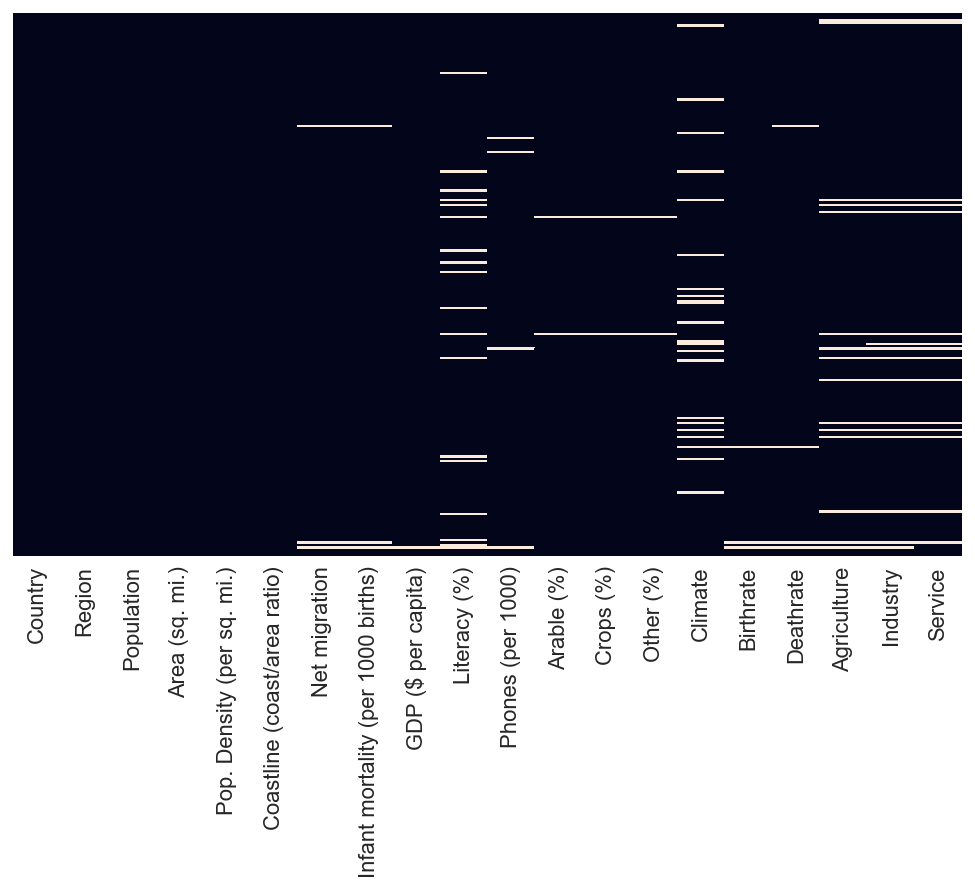

In [118]:
sns.heatmap(c_data.isna(),cbar=False,yticklabels=False)
plt.show()

We pass to the function the c_data.isna(), which will evaluate each value in each column and return True or False depending on whether there is a missing value or not. We set the cbar, which is a sort of legend, and yticklabels to False to remove the label on Y axis because we don't need them in this case.

All the white line represent a missing data in the columns, we can see that there is a lot of missing data for literacy, climate agriculture, industry and service column.

So this means that we should not rely on these 5 columns(literacy, climate, agriculture, industry and service) to come up with generalized conclusions/statement because there are so many missing data.

#### Bar plot

#### Example 1 : Number of countries per region

A Bar plot uses a bar to represent the number of elements found in a column of a dataframe.

Let's represent the number of countries by region using a bar plot.

In [119]:
country_per_reg = c_data["Region"].value_counts()

In [120]:
country_per_reg

SUB-SAHARAN AFRICA                     51
LATIN AMER. & CARIB                    45
ASIA (EX. NEAR EAST)                   28
WESTERN EUROPE                         28
OCEANIA                                21
NEAR EAST                              16
EASTERN EUROPE                         12
C.W. OF IND. STATES                    12
NORTHERN AFRICA                         6
NORTHERN AMERICA                        5
BALTICS                                 3
Name: Region, dtype: int64

By selecting the region columns, we can count different values found in that column grouped by region and store this in country_per_reg variable.

In [121]:
c_data.groupby("Region")["Country"].count()

Region
ASIA (EX. NEAR EAST)                   28
BALTICS                                 3
C.W. OF IND. STATES                    12
EASTERN EUROPE                         12
LATIN AMER. & CARIB                    45
NEAR EAST                              16
NORTHERN AFRICA                         6
NORTHERN AMERICA                        5
OCEANIA                                21
SUB-SAHARAN AFRICA                     51
WESTERN EUROPE                         28
Name: Country, dtype: int64

There is also an alternative way of getting the count by using the groupby function. This function will group the whole data table according to the different values found in the Region column, and since we are interested in the counting of countries, we extract only the Country columns and use the count function to give us the total count.

Now that we crunch the numbers, let's put them in a plot.

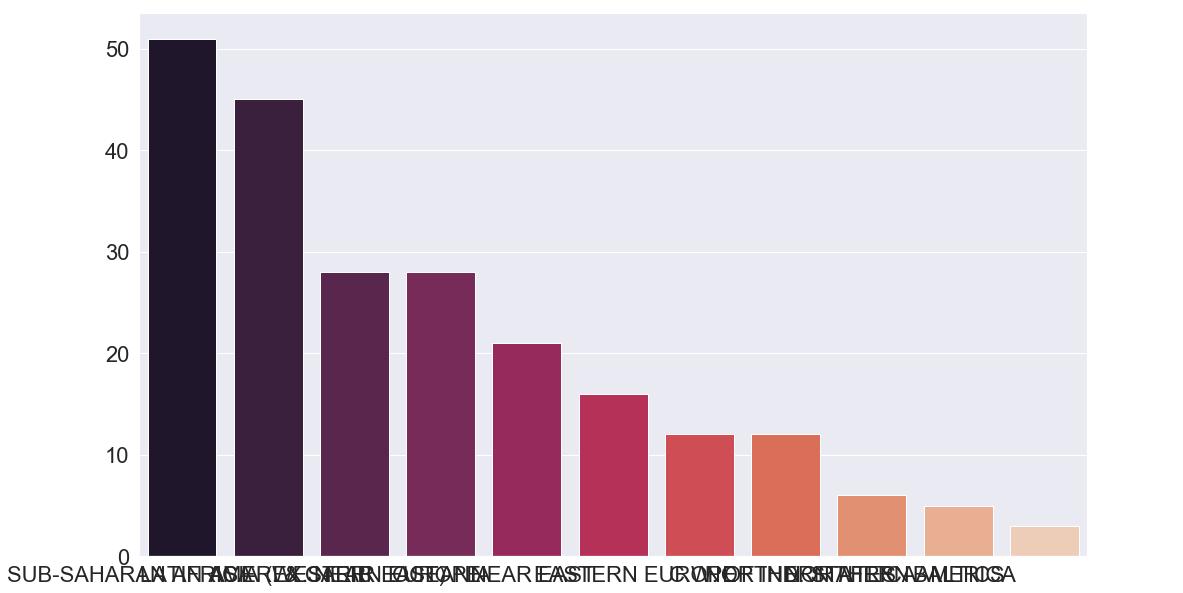

In [122]:
sns.barplot(x=country_per_reg.index,y=country_per_reg.values,palette="rocket")

we will use sns to access to the imported Seaborn library, now we can use its bar plot function to create the plot. The arguments that we pass is x which is the column that goes to the X axis which in our case is the index of country_per_reg. The index is like a primary key in databases system and is located at the first column of any dataframe. On the Y axis, we will put the value of country_per_reg which is the count of countries since we only had two columns (one is the dataframe's index and the other is the dataframe's value). Finally, we specify the palette which is the color of the bars.

Seaborn has a wide range of pre-defined palette and here is a list of all of them: 

Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

Try to play around with them by using different palette names.

Let's add some few things to our plot.

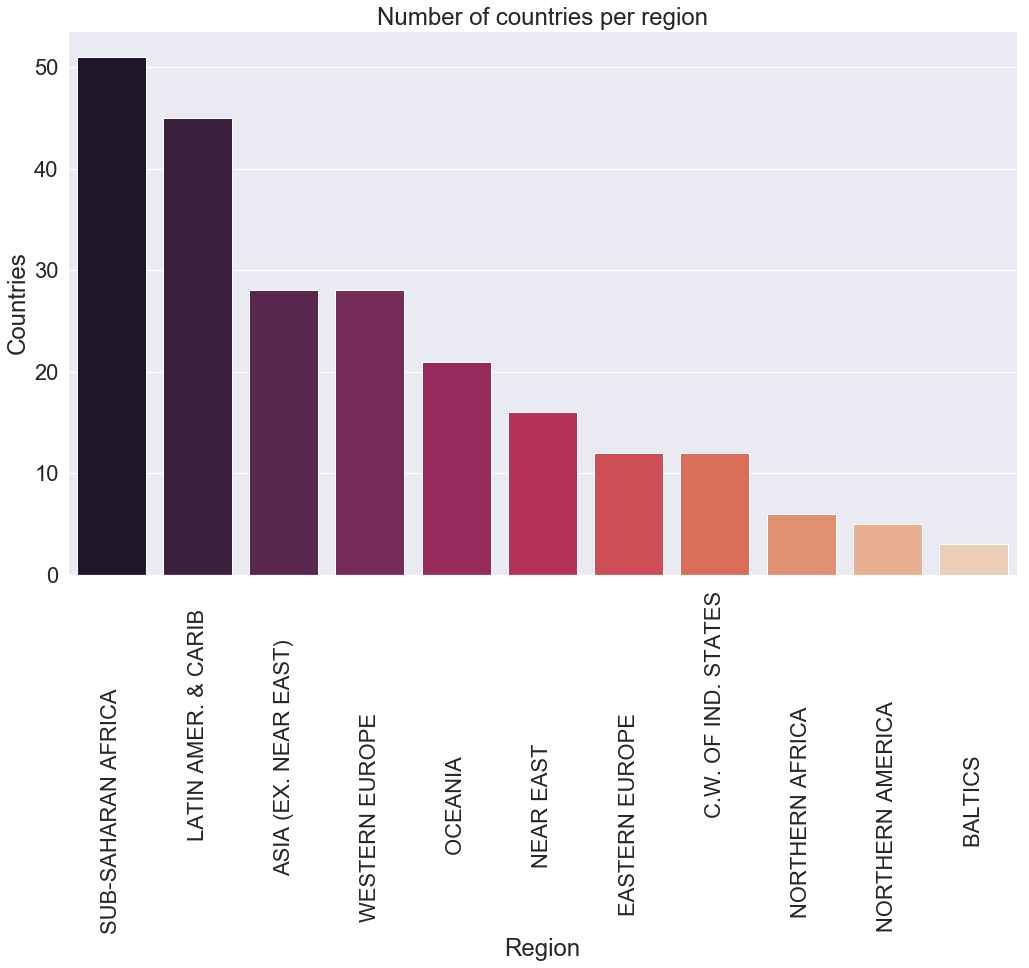

In [183]:
sns.barplot(x=country_per_reg.index,y=country_per_reg.values,palette="rocket")
plt.xticks(rotation=90)
plt.xlabel("Region")
plt.ylabel("Countries")
plt.title("Number of countries per region")
plt.show()

In our first plot, have you noticed that the names of the regions on the X axis overlap each other? making it difficult to read. A solution to that would be to rotate the label by 90° using the plt variable from matplotlib and call the xticks function on it then pass as argument rotation = 90.

Then we gave labels to the X and Y axis by passing the names as arguments.

After that, we give a title to the plot using the title function.

Finally, we use plt.show() to display the plot

Now we can do the observation of the plot.

#### What is an observation?

Now comes my favorite part of data analysis which is the observation, but before we jump into it let's start by explaining what is an observation of a plot and why it is very crucial in data analysis.

An observation of a plot is all the findings found from observing a plot and it is important because it is through this way we communicate these findings to other people who don't necessarily have the technical background to understand what is going on just by looking at a plot. In other words, an observation is a method of storytelling findings from a plot.

#### Observations

Let's do the observation of the bar plot above. First, we notice that the Sub-Saharan Africa region has more than 50 countries which are almost double the countries in Western Europe and Asia. We can also observe that Latin America & Caribbean take a second place with around 45 countries.

Oceania, near east, c.w. of ind. states and eastern Europe have an average of around 15 countries each and finally, Northern Africa, Northen America with Baltics have no more than 6 countries.

With this observation, we can have a clear understanding of the number of countries per region around the world.

#### Example 2 : Top 30 most densely populated countries in the world

Let's see another example, this time we are going to compare the top 30 most densely country side-by-side using a bar plot.

In [124]:
c_density = c_data[["Country","Pop. Density (per sq. mi.)"]]

In [125]:
c_density

,Country,Pop. Density (per sq. mi.)
0,Afghanistan,48.0
1,Albania,124.6
2,Algeria,13.8
3,American Samoa,290.4
4,Andorra,152.1
5,Angola,9.7
6,Anguilla,132.1
7,Antigua & Barbuda,156.0
8,Argentina,14.4
9,Armenia,99.9


We first select only the country and population density columns and store it in the c_density variable.

In [126]:
top_30_density = c_density.sort_values(by="Pop. Density (per sq. mi.)",ascending=False).head(30)

Now we sort the dataframe and keep only the top 30 countries using the head function by passing 30 as the argument.

In [127]:
top_30_density

,Country,Pop. Density (per sq. mi.)
138,Monaco,16271.5
122,Macau,16183.0
184,Singapore,6482.2
91,Hong Kong,6355.7
78,Gibraltar,3989.7
74,Gaza Strip,3968.8
129,Malta,1266.5
22,Bermuda,1241.0
127,Maldives,1196.7
15,Bahrain,1050.5


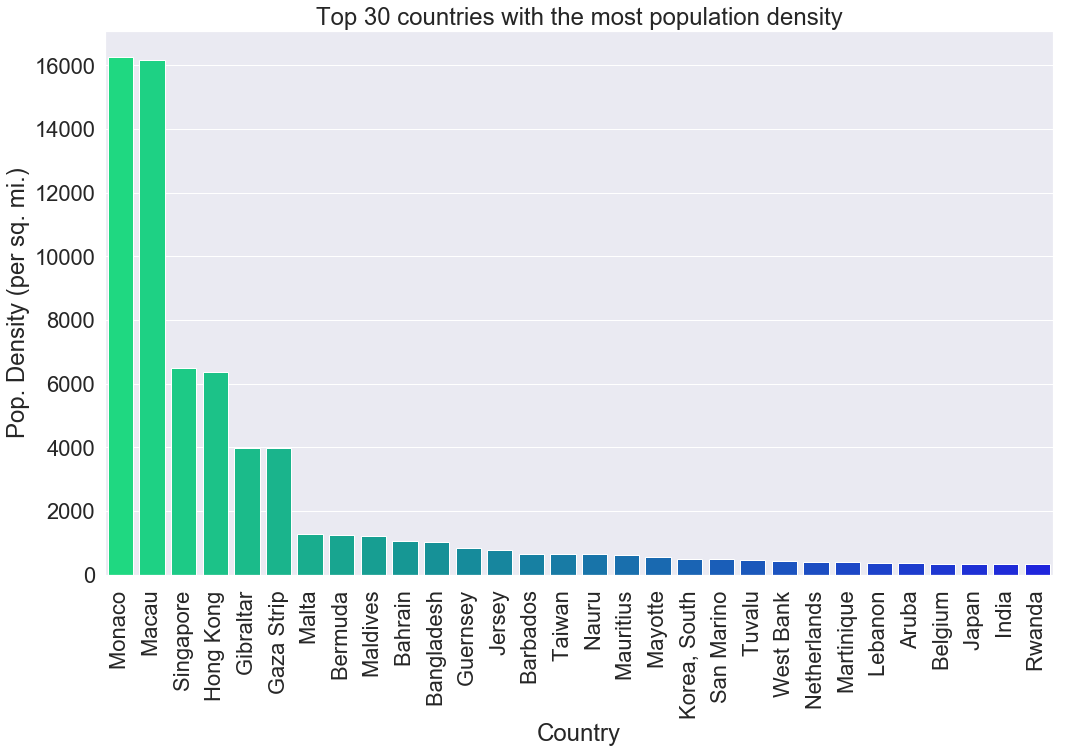

In [220]:
sns.barplot(x=top_30_density["Country"],y=top_30_density["Pop. Density (per sq. mi.)"],palette="winter_r")
plt.xticks(rotation=90)
plt.title("Top 30 countries with the most population density")
plt.show()

Now the fun part! All the code has been explained.

#### Observation

We can see that Monaco and Macau are the most densely populated places on earth by far, followed by Singapore and Hong Kong.

One thing to notice here is that the most densely populated places have a small area which makes sense since the population must live very close to each other in order to fit in a small country.

#### Example 3 : Least populated countries in the world

Let's do another example because it is so much fun. isn't it?

In [129]:
c_pop = c_data[["Country","Population"]]

We get the country with population columns and store it in a variable called c_pop

In [130]:
less_pop_country = c_pop.sort_values(by="Population",ascending=False).tail(20)

In [131]:
less_pop_country

,Country,Population
3,American Samoa,57794
80,Greenland,56361
66,Faroe Islands,47246
38,Cayman Islands,45436
172,Saint Kitts & Nevis,39129
119,Liechtenstein,33987
138,Monaco,32543
177,San Marino,29251
78,Gibraltar,27928
28,British Virgin Is.,23098


We sort the dataframe using the population number and only select 20 countries from the bottom using the tail function.

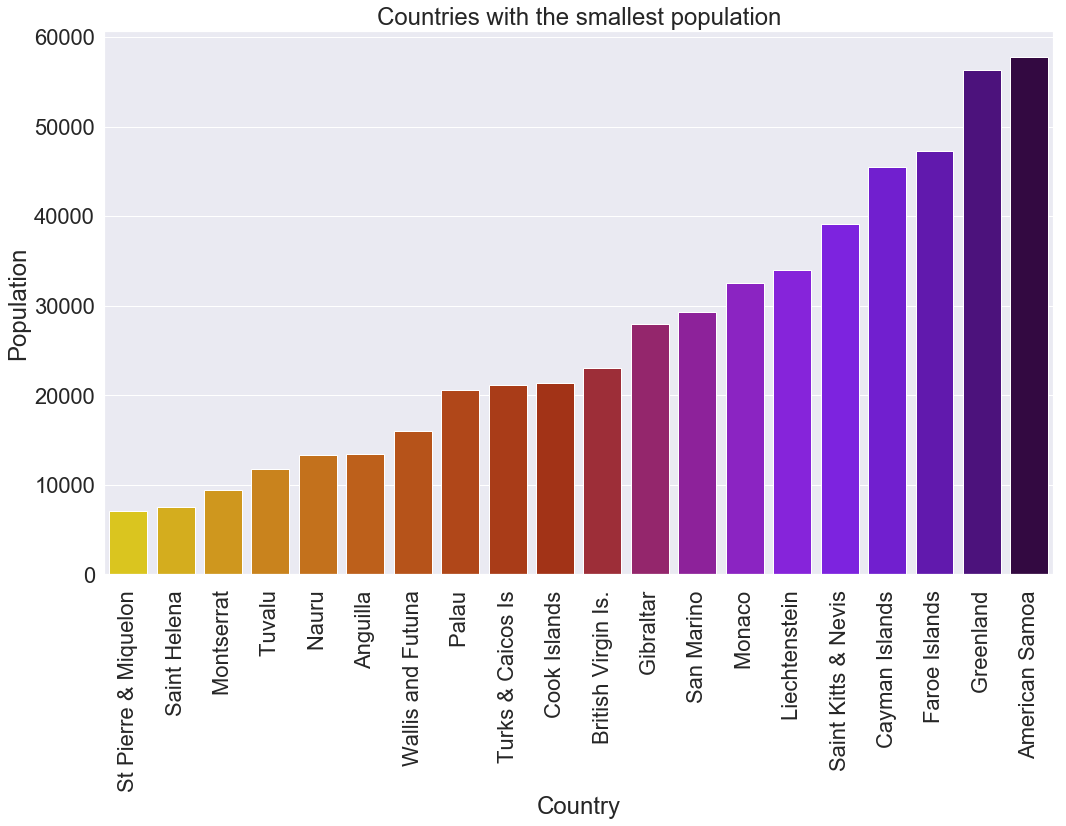

In [221]:
sns.barplot(x=less_pop_country["Country"],y=less_pop_country["Population"],palette="gnuplot")
plt.xticks(rotation=90)
plt.gca().invert_xaxis()
plt.title("Countries with the smallest population")
plt.show()

This code plots the least populated countries in the world starting from the last moving forward. We were able to achieve this by inverting the order on the X axis using plt.gca().invert_xaxis().

To find all the possible parameters of a bar plot, visit its documentation page [here](https://seaborn.pydata.org/generated/seaborn.barplot.html)

#### Scatter plot

#### Example 1 : Infant mortality in randomly chosen countries

A scatter plot is a plot that represents data using Cartesian coordinates on a typical X and Y axis.

let's illustrate this using an example.

In [133]:
rand_country_inf_mortal = c_data.sample(n=10)[["Country","Region","Infant mortality (per 1000 births)"]]

In [134]:
rand_country_inf_mortal

,Country,Region,Infant mortality (per 1000 births)
28,British Virgin Is.,LATIN AMER. & CARIB,18.05
132,Mauritania,SUB-SAHARAN AFRICA,70.89
33,Burundi,SUB-SAHARAN AFRICA,69.29
113,Laos,ASIA (EX. NEAR EAST),85.22
222,West Bank,NEAR EAST,19.62
168,Romania,EASTERN EUROPE,26.43
83,Guam,OCEANIA,6.94
53,Czech Republic,EASTERN EUROPE,3.93
54,Denmark,WESTERN EUROPE,4.56
67,Fiji,OCEANIA,12.62


Let's randomly select 10 rows from our c_data by using the sample function and pass to it n=10 as arguments to specify the number of rows to be selected from the country, region and infant mortality and store it in rand_country_inf_mortal variable.

Now let's plot this.

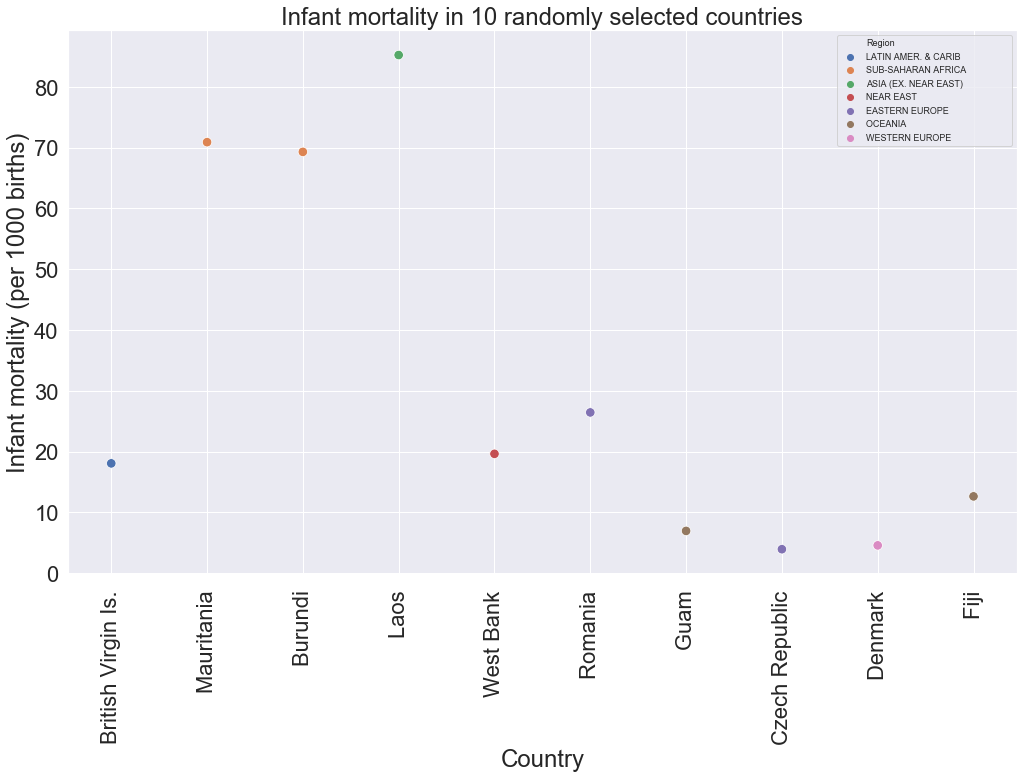

In [222]:
sns.scatterplot(x=rand_country_inf_mortal["Country"],y=rand_country_inf_mortal["Infant mortality (per 1000 births)"],hue=rand_country_inf_mortal["Region"],s=90)
plt.xticks(rotation=90)
plt.legend(prop={'size': 9})
plt.title("Infant mortality in 10 randomly selected countries")
plt.show()

We are using the seaborn library to access to the scatter plot function. We pass to the X axis the countries and to the Y axis we give it the infant mortality, we increase the size of the marker by 90. Last, we change the size of the legend and set a title.

There is this argument called hue in the scatter plot function to differentiate the markers using a condition. In our case, hue gives a different color to the markers depending on the region.

#### Observations

We can clearly see that Laos from Asia has the highest infant mortality among all countries randomly selected followed by Burundi and Mauritania at around 70 child deaths. The rest of the countries have a relatively low child mortality with the Czech Republic having the lowest at around 4 child deaths.

From the previous observation, we can hypothetically say that Asia has the highest child mortality followed by Sub-Saharan Africa while Eastern and Western Europe have the lowest child mortality. but how can we prove that? keep on reading to find out.

Note: By running the same code, there is a very small probability that the same countries would be selected.

#### Example 2 : Average infant mortality per region

The second last sentence in the previous observations was an assumption because we said that based on a small number of countries per region.

But we can easily verify this by getting the mean of infant mortality per region and plot it.

In [138]:
av_child_mortal_region = c_data.groupby("Region")["Infant mortality (per 1000 births)"].mean()

In [139]:
av_child_mortal_region

Region
ASIA (EX. NEAR EAST)                   41.780000
BALTICS                                 8.103333
C.W. OF IND. STATES                    44.410000
EASTERN EUROPE                         12.686667
LATIN AMER. & CARIB                    20.092667
NEAR EAST                              23.377500
NORTHERN AFRICA                        30.916000
NORTHERN AMERICA                        8.628000
OCEANIA                                20.203684
SUB-SAHARAN AFRICA                     80.039216
WESTERN EUROPE                          4.730357
Name: Infant mortality (per 1000 births), dtype: float64

We get back the mean of infant mortality column grouped by region then store it in a variable.

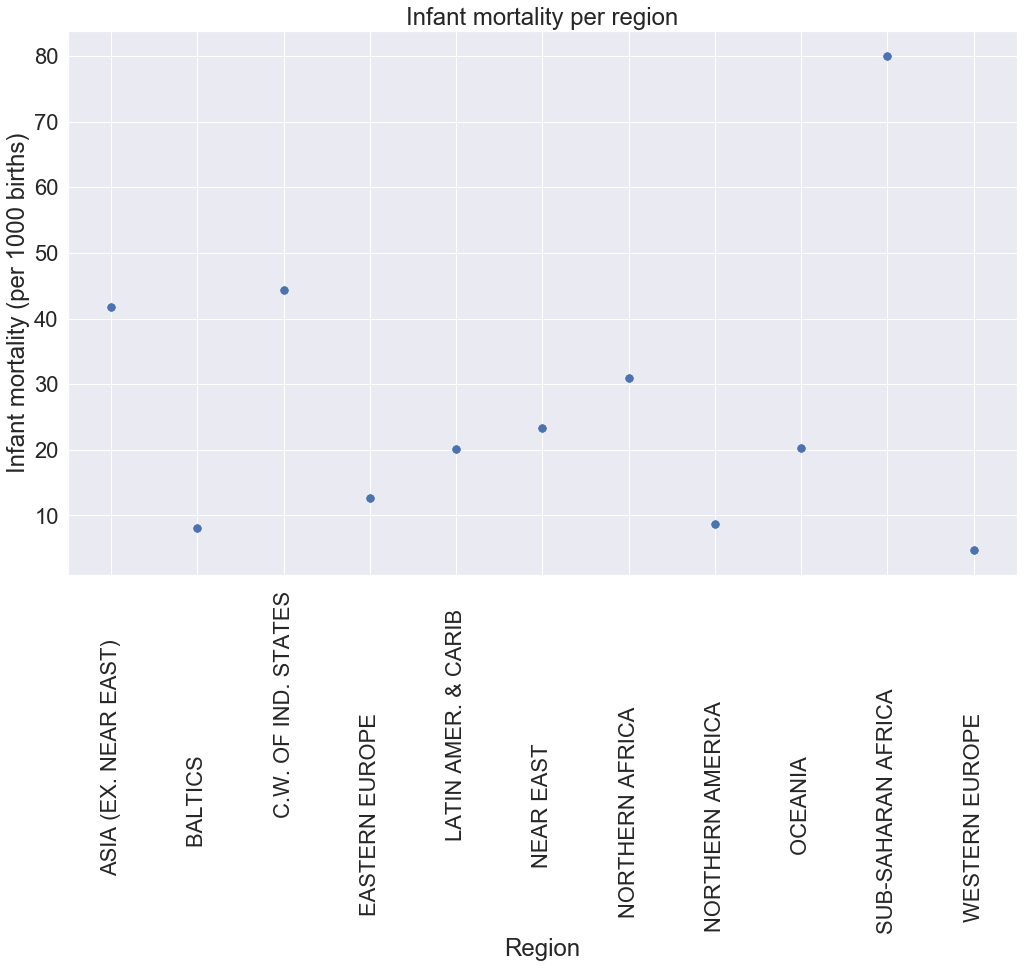

In [223]:
sns.set(font_scale=2)
sns.scatterplot(x=av_child_mortal_region.index,y=av_child_mortal_region.values,s=90)
plt.xticks(rotation=90)
plt.ylabel("Infant mortality (per 1000 births)")
plt.title("Infant mortality per region")
plt.show()

We set the X axis to be equal to the index which is the different regions and the Y axis to be equal to the values of av_child_mortal_region average and set the marker's size to 90.

Next, we set ylabel with the title and then rotate the xticks to 90.

#### Observations

Now after seeing this plot, we can confidently say that there is high child mortality in Sub-Saharan Africa than any other places in the world with an average of 80 children dying for every 1000 born.

Asia and c.w. of ind. states register relatively high mortality with 42 and 45 respectively, this contradicts the hypothesis we made previously suggesting that we should look at the average values before making a generalized statement.

The rest of the region have a low child death with Western Europe having the lowest among all the regions.

To read more about the scatter plot, read its documentation[here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html).

#### Boxplot

Let's talk about a box plot, what is a box plot would you ask? A box plot is a plot that represents the 1st quantile, 2nd quantile(median), the 3rd quantile, the minimum, the maximum and the outliers.

Now if you don't know what are those, worry not these are typically used in statistics and we will try to briefly explain them.

We will start with quantile, so to get the quantiles of a dataset we first sort the dataset and then we define the following:

* 1st percentile also called lower percentile or 25% percentile splits off the lowest 25% of a dataset from the highest 75%.
* 2nd percentile also called median or 50% percentile cuts the dataset in half.
* 3rd percentile also called higher percentile or 75% percentile splits off the highest 25% of a dataset from the lowest 75%.

The 1st,2nd and 3rd percentile constitute the interquartile range of the box plot.

The minimum and the maximum represent the lowest and the highest value in the dataset.

Finally, the outliers are values that are distant apart from the rest of the values in the dataset.

The general representation of a box plot is as follows

![percentile](/blog/assets/post_cont_image/percentile.png)

picture credit: [arcgis](https://pro.arcgis.com/en/pro-app/help/analysis/geoprocessing/charts/box-plot.htm)

#### Example : GDP per region

Now, let's quickly look at an example of the box plot. We will plot the GDP of each region.

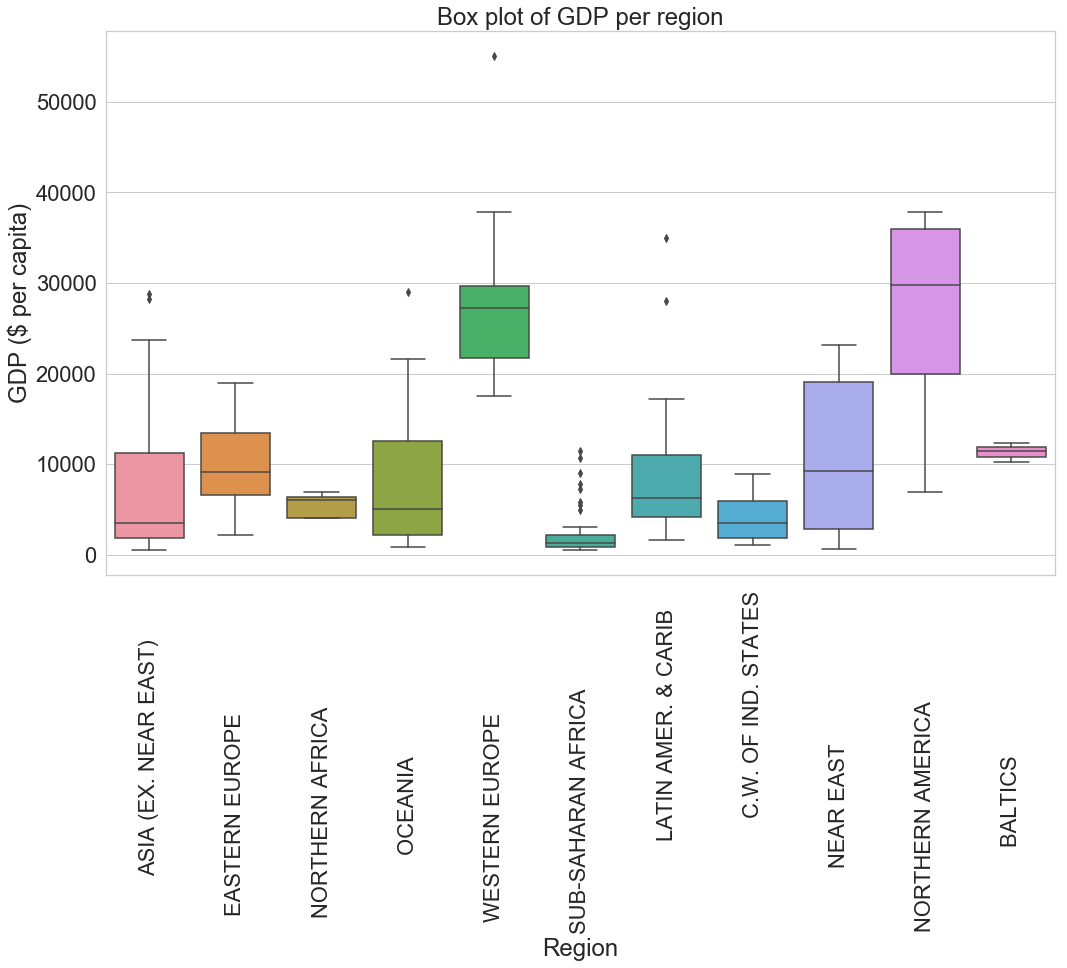

In [143]:
sns.set(style="whitegrid",font_scale=2)
sns.boxplot(x="Region",y="GDP ($ per capita)",data=c_data)
plt.xticks(rotation=90)
plt.title("Box plot of GDP per region")
plt.show()

In the code above, we are starting by setting the aesthetics (style) of the grid as a white grid. To read more about the style of grids in seaborn read the documentation [here](https://seaborn.pydata.org/tutorial/aesthetics.html).

Now comes the box plot code, we set the X axis to the regions, the Y axis to the GDP and finally specify which data we are using in our case its c_data.

We set the X ticks to rotate 90 degrees, set the title of the plot and then display the box plot.

#### Observation

Northern America and Western Europe have the highest GDP than any other region. In Western Europe, We can also see that there is one outlier with a GDP of more than \\$55000 which is most probably Luxembourg.

Some other interesting observation can be seen on the Near East region's plot, which registers the longest interquartile range which basically means that there is a big gap between the richest countries and poorest countries in that region than anywhere else.

Another interesting observation is in the case of Asia, where we can see that only a small number of countries have a GDP less than \\$5000 which is less than the average GDP worldwide and we also observe two outliers with a GDP greater than \\$25000. Oceania has a similar plot to Asia.

Finally, Sub-Saharan Africa has the lowest GPD on average with its maximum value less than \\$5000 but register quite a number of outliers (eight in total) which is unseen in any other region.

To read more about the box plot, read its documentation [here](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

#### Joint plot (kde and hex)

The joint plot is used to show the density of values from two different columns using contour area to represent the level (height) where the value is located just like the topographic map.

![joint_plot](/blog/assets/post_cont_image/joint_plot.png)

picture credit: [mathworks](https://www.mathworks.com/help/matlab/ref/surfc.html)

Think of a joint plot in the same way as the image above.

Let's analyze the image, the elements with a value from 0.1 to 5 on the vertical axis will be placed on a sort of hill where the peak will be 5 and the elements with a value from -0.1 to -5 will be placed on a valley where the bottom is -5. The values with 0 will be located on flat plane.

To differentiate the values on the hill or valley, colors will be used which means that the elements around 5 will tend to be orange, those around 0 will be green and those around -5 will turn blue.

With this, we can project the plot from above to a flat plane using the contour with colors to show the different elevations of the value on the plot. That's what exactly the join plot does.

#### Example : Birthrate and literacy

Coming back to our dataset, let's joint plot the birthrate and the literacy rate.

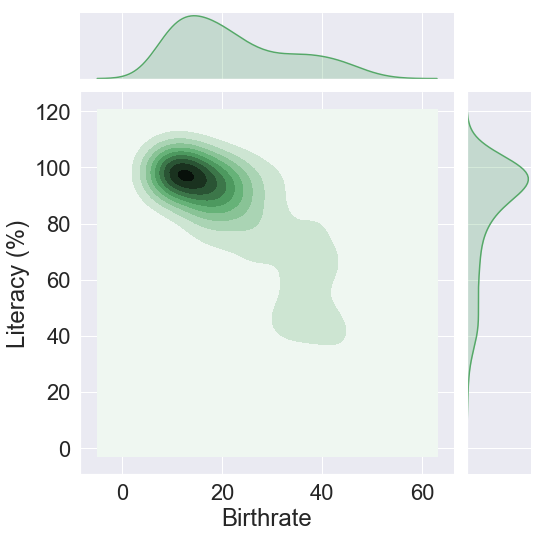

In [228]:
sns.jointplot(c_data["Birthrate"],c_data["Literacy (%)"],height=8,color="g",kind="kde")
plt.show()

The first argument in the joint plot is the birthrate placed on the X axis and the second is the literacy, we'll give to the plot a height of 8 and a green color.

There is an argument called kind that determines the type of plots that are being intersected together (The small line at the top and the other one on the right of the main plot), here we have used "kde" which stand for kernel density estimates. The other type are "scatter", "reg", "resid" and "hex".

Let's see what happen when we use "hex".

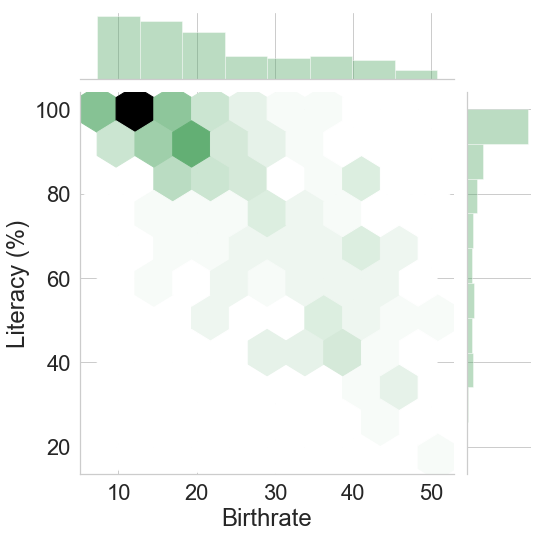

In [150]:
sns.jointplot(c_data["Birthrate"],c_data["Literacy (%)"],height=8,kind="hex",color="g")
plt.show()

It is the same plot as before just that this time we are using hexagon with lighter or darker color to represent the density of data. The darker the hexagon, the higher the concentration of data. 

#### Observation

Let's use the first plot (kde) to do the observation. we see that the area near the coordinate (16,100) is very dark this tells us that in countries where nearly all the citizens are literate, the birthrate is around 16. If we could visualize this plot in 3D, the point at (16,100) would be on top of a hill.

We observe also that as the percentage of literate people drops, the percentage of births increases accordingly. This is illustrated in the countries where 80% of citizens are literate, the birthrate has almost double to 23.

Finally, we can see that in the countries where the birthrate is 30 and above, only 60% to 40% of the population is literate.

To read more about the joint plot, read its documentation [here](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

### Challenge

For your first challenge, joint plot the birthrate and GDP using a kernel density estimates (kde) with a red color using a hexadecimal color code (do not confuse with the hex joint plot type ). Give a clear observation.

Go ahead and try the challenge and after you have finished, come back to compare your solution with mine.

### Challenge solution

Alright, let's go through the solution which looks almost the same as the other plot. The only difference is how to set the color using a hex color code. You can generate a hex color code on this website [here](https://www.hexcolortool.com/).

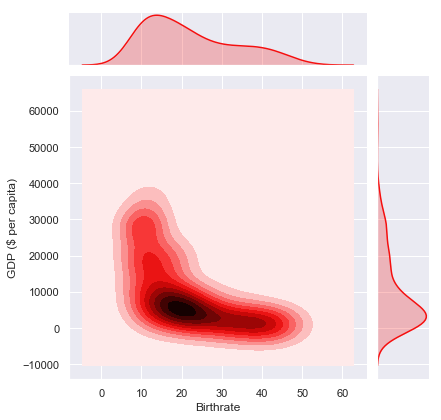

In [232]:
sns.set(font_scale=1)
sns.jointplot(c_data["Birthrate"],c_data["GDP ($ per capita)"],kind="kde",color="#f50f0f")
plt.show()

#### Observation

Using the interpretation of the plot above, we can clearly see that the countries with a GDP higher than \\$15000 have a birthrate less than 15. The majority of countries with a birthrate of 20 have a GDP of around \\$5000.

On the contrary, the countries with the lowest GDP register the highest birthrate.

#### Distribution plot

#### Example 1 : Distribution of the birthrate

A distribution plot is very useful in the sense that it gives us an overview of how the values in a column are distributed.

A distribution plot is also called PDF (Probability Density Function). PDF will peak at a certain point if many values are squids around that point else it will flatten if no value is present.

The best way to see this is through an example of course. In the example below, we want to see how the birthrate around the world is distributed.

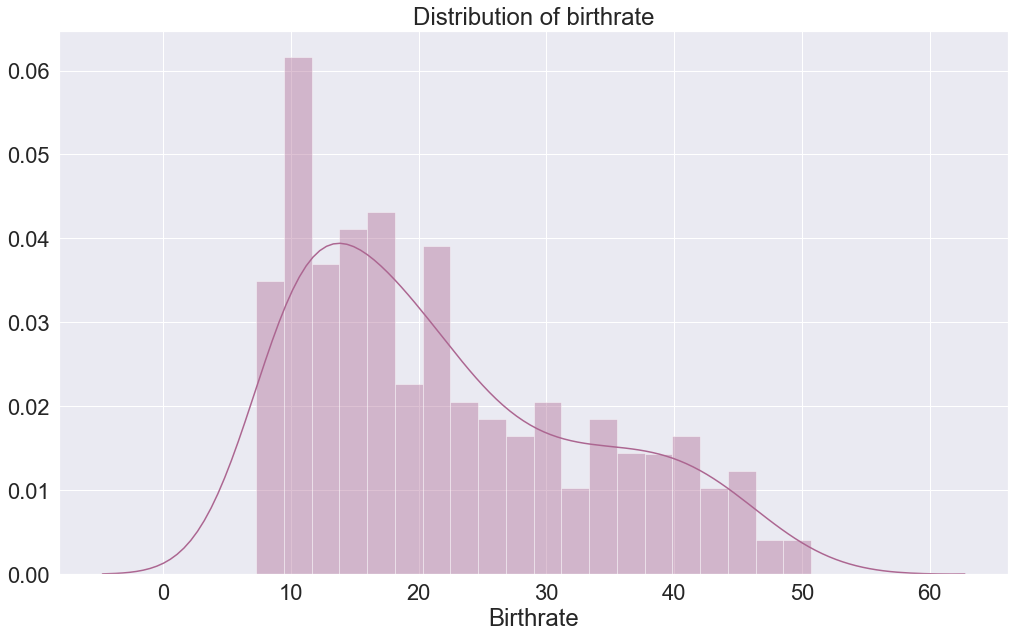

In [234]:
sns.set(font_scale=2)
sns.distplot(c_data["Birthrate"],bins=20,color="#ac6691")
plt.title("Distribution of birthrate")
plt.show()

We are using the distplot function from the seaborn, we pass the column that will be evaluated on the X axis, the Y axis is the amplitude. The X axis is divided into 20 equal parts also called bins that represent each the amplitude of the birthrate.

We can see that we have two different plots inside one figure, the plot that looks like a bar plot is called histogram and the other that look like a smooth line is the kernel density estimates (kde).

So what is the difference between the two, well they are the same just visualized differently, they all represent the amplitude of a value at a particular bin on the X axis. The histogram gives the precise amplitude while the kernel density estimates, as its name suggests draw a line that estimates the distribution of values using the edges of the histogram.

#### Observation

Looking at the histogram, the amplitude is the highest at bin 12-13 and from there it decreases in amplitude till reaching bins 60. The kde plot shows the same just that this time this is represented using a smooth graph.

#### Example 2 : Distribution of the GDP

For the second example, let's see the distribution of GDP around the world.

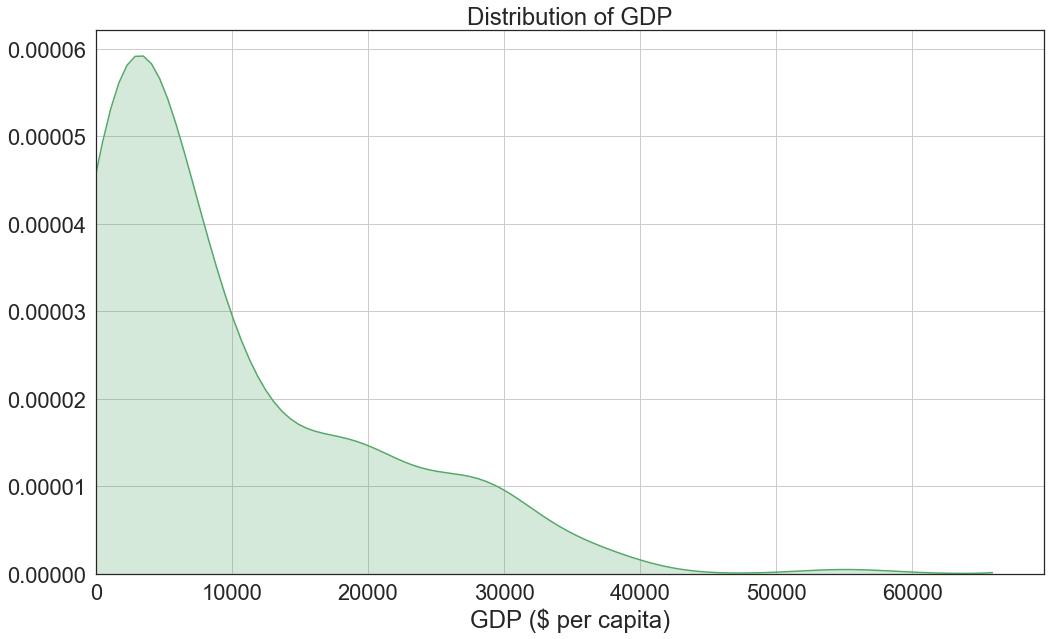

In [20]:
sns.set(style="white",font_scale=2)
sns.distplot(c_data["GDP ($ per capita)"],color="g",bins=20,hist=False,kde_kws={"shade":True})
plt.title("Distribution of GDP")
plt.grid()
plt.xlim(0, None)
plt.show()

We first set a white grid with font scale of 1, then start plotting.

We passed GDP columns on the X axis, a bins of 20, set the color to green, set the histogram to False which basically means that we are hiding it and finally pass the dictionary {"shade": True} to the kde_kws which changes the propriety of the kde to shade the area under the plot to match the color. 

Finally, we give it a title, grid, set the X axis to start from 0 because we can't technically have a negative GDP and show the plot.

#### Observation

Looking at the plot, we can see that the majority of countries have a GDP between \\$3000 to \\$4000 and from there the GDP decreases drastically to only stabilize between \\$15000 to $30000 which mean that there is quite a number of countries in this range.

Finally, the plot continues to fall rapidly which means fewer and fewer countries have a GDP greater than \\$30000.

#### Example 3 : Distribution of deathrate, birthrate, population and GDP in one figure

There is this very useful matplotlib function called figure, think of a figure as a container of many the plots. We can create different type of plots and put them into one figure but since we are in the distribution plot section, let's create 4 distribution plots.

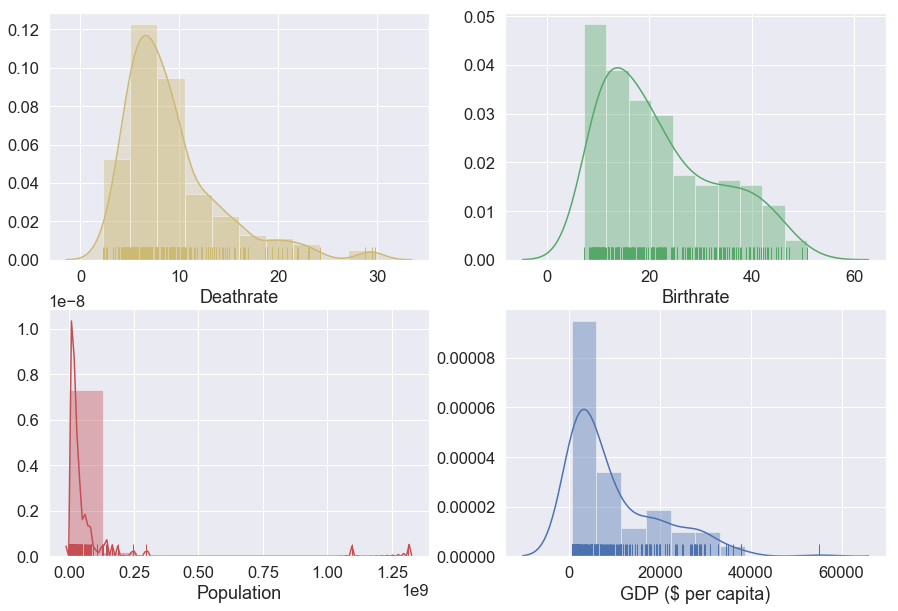

In [231]:
sns.set(style="darkgrid",font_scale=1.5)
f,axes=plt.subplots(2,2,figsize=(15,10))
sns.distplot(c_data["Deathrate"],bins=10,rug=True,ax=axes[0,0],color="y",kde_kws={"shade":True})
sns.distplot(c_data["Birthrate"],bins=10,rug=True,ax=axes[0,1],color="g")
sns.distplot(c_data["Population"],bins=10,rug=True,ax=axes[1,0],color="r")
sns.distplot(c_data["GDP ($ per capita)"],bins=10,rug=True,ax=axes[1,1])
plt.show()

We start first by setting the grid to dark with a font_scale of 1.5 and then use the subplots function pass to it 2 as the first argument to represent two rows then another 2 to represent two columns. Finally, the third argument is the figure's size as a tuple with 15 for the width and 10 for the height.

The subplot function will return a figure and the axes variables. The axis helps us to select a specific plot in the figure for example if we want to select the birthrate plot, we set the axes to [0,1] : 0 for the index of the row and 1 for the index of the column in the figure.

Finally, it is time to draw the distribution plots for each. we set ax parameter to the axes location and set rug to True, rug represents the distribution of values on small bars (called rugplot that strangely resemble barcodes) at the bottom of the X axis.

To know more about distribution plot, read the documentation [here](https://seaborn.pydata.org/generated/seaborn.distplot.html).

#### Violin plot

There is this very interesting plot called violin plot that combines a box plot and a distribution plot in a single plot.

Its name comes from the fact that this plot has a form of a violin and its general structure is like this

![violin_plot](/blog/assets/post_cont_image/violin_plot.svg?sanitize=true)

picture creadit: [datavizcatalogue](https://datavizcatalogue.com/methods/violin_plot.html)

Let's explain the image above, the small black rectangle inside the purple area represents the interquartile range like the one in a box plot with the white dot in its middle representing the median. The two line (upper and lower adjacent value) extend to the minimum and the maximum.

Now let's focus on the purple area, well this is the distribution plot placed in a vertical position and it is drawn symmetrically on the interquartile axes. The purple area expands to include all the outliers of the box plot.

We are going to plot GDP per region using the violin plot.

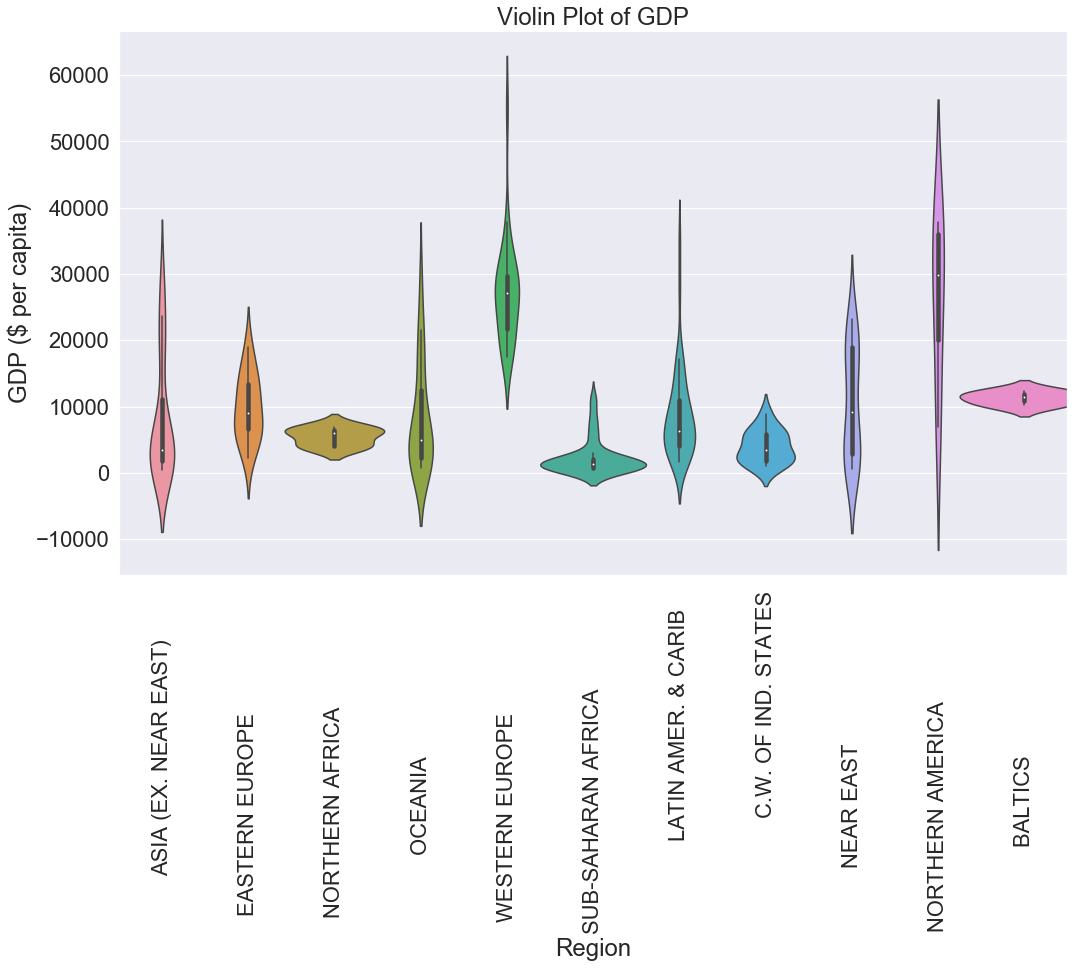

In [49]:
sns.violinplot(x="Region",y="GDP ($ per capita)",data=c_data,width=1.5)
plt.xticks(rotation=90)
plt.title("Violin Plot of GDP")
plt.show()

Let's plot the violin plot by placing at the X axis the different regions in the world and at the Y axis the GDP, set the data to our c_data and increase the width of our violin plot to 1.5 to avoid plots cluttering.

Finally, we rotate the X ticks, set the title and display the plots.

#### Observation

If we compare the box plot that we plotted earlier on and the small back rectangle inside the violin plot, we can see that they are definitely the same just different sizes. It's like we have taken the box plots and shrink them down to fit in the violin plot. This means that the observation we did on the box plot is equally applicable here.

Observing the distribution plot we can see that they largely vary depending on the region, for example, we can see in Sub-Saharan Africa that most of the countries have a GDP lower that \\$5000 just by looking at the curve with a large width which shows a high concentration. Other regions that have a similar distribution are northern Africa and c.w of ind. states with both an average GDP less than \\$10000.

Northern American registers a very long and slim plot, this means that there is a huge gap between the countries with a higher GDP and those with a lower GDP.

Looking at Western Europe, there is no country with a GDP lower than \\$10000. Western Europe also registers a very sharp top that corresponds to a country with an exceptional GDP (this is an outlier). Latin Amer & Carib also have outliers.

To read more about violin plot, read its documentation [here](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

#### pdf and cdf

We have already seen a pdf, now let's see a cdf (Cumulative Distribution Function). A cdf is a representation of cumulation of data on a 0 to 100% scale.

Let's understand cdf through an example using the GDP. First, let's get the pdf and the cdf this time we are not going to use the seaborn library instead, we use numpy.

In [5]:
hist, bins_edge = np.histogram(c_data["GDP ($ per capita)"].dropna(),density=True,bins=20)
print(hist)
print(bins_edge)

[1.31284645e-04 5.83487309e-05 3.72783559e-05 3.07951635e-05
 1.13455866e-05 1.13455866e-05 2.10703751e-05 1.62079808e-05
 8.10399040e-06 1.13455866e-05 1.45871827e-05 4.86239424e-06
 3.24159616e-06 4.86239424e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.62079808e-06]
[  500.  3230.  5960.  8690. 11420. 14150. 16880. 19610. 22340. 25070.
 27800. 30530. 33260. 35990. 38720. 41450. 44180. 46910. 49640. 52370.
 55100.]


We use the histogram function from np variable used to import the numpy library, we pass to the function the GDP columns where the missing values have been ignored and set the density to True which means that the result is the value of the probability density function at the bin, normalized such that the integral over the range is 1. Finally, we set the bins to 20.

Two lists (histogram and the bins edge) will be returned.

In [6]:
pdf = hist/sum(hist)
cdf = np.cumsum(pdf)
print(pdf)
print(cdf)

[0.35840708 0.15929204 0.10176991 0.0840708  0.03097345 0.03097345
 0.05752212 0.04424779 0.02212389 0.03097345 0.03982301 0.01327434
 0.00884956 0.01327434 0.         0.         0.         0.
 0.         0.00442478]
[0.35840708 0.51769912 0.61946903 0.70353982 0.73451327 0.76548673
 0.82300885 0.86725664 0.88938053 0.92035398 0.96017699 0.97345133
 0.98230088 0.99557522 0.99557522 0.99557522 0.99557522 0.99557522
 0.99557522 1.        ]


To get the pdf, we divide each value in the histogram by the sum of the histogram. For the cdf, we use the cumsum function and pass in the pdf.

I am sure that at this time, you must be wondering how is the cdf useful but be patient you will see its usefulness in just a moment.

Now that we have the pdf and the cdf, time to plot.

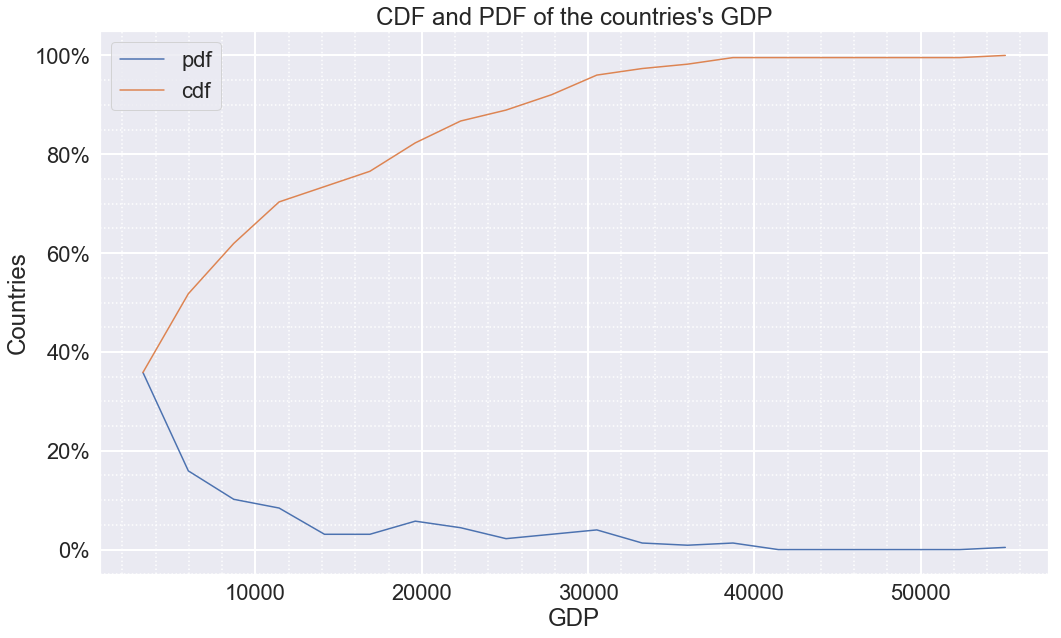

In [48]:
fig, ax = plt.subplots()
ax.set_yticklabels(["-20%","0%","20%","40%","60%","80%","100%"])
pdf_line = plt.plot(bins_edge[1:],pdf)
cdf_line = plt.plot(bins_edge[1:],cdf)
plt.xlabel("GDP")
plt.ylabel("Countries")
plt.title("CDF and PDF of the countries's GDP")
plt.gca().legend(("pdf", "cdf"))
plt.minorticks_on()
ax.grid(which='major', color='w', linewidth=2)
ax.grid(which='minor', linestyle=':', linewidth=1.5, color='w')
plt.show()



We are using the subplots function to get the axis (X ans Y axis) of the plot, then change the Y label from ["-0.2","0.0","0.2","0.4","0.6","0.8","1.0"] to the percentage equivalent ["-20%","0%","20%","40%","60%","80%","100%"].

We will plot this one using matplotlib instead of seaborn since we want to do a simple line plot of X and Y axis. We will have 2 plots, one for the pdf and the other for cdf. We pass the bin_edge (which are the edges of the histogram of GDP) to the X axis starting from index 1 because the element at index 0 corresponds to -20% (on the Y axis), and we can not have a -20% of countries. We pass the pdf and cdf to the Y axis then stored them in pdf_line and cdf_line variable respectively.

We set the X and Y label, a legend, give it a title and then set the minor grid to on (the small dot in-between the main grid) in order to see the intervals within the GDP's grid.

Finally, we display the plot.

#### Observation

When it comes to the observation, the pdf line corresponds to the pdf already seen previously during example 2: distribution of GDP. 

Let's focus on the cdf, a cdf help us to understand the cumulation of values of a particular feature(columns). In this case, it is the cumulation of countries depending on their GDP on a scale of 0 to 100%.

Looking at the cdf plot, we can conclude that only 50% of countries in the world have a GDP higher than \\$6000. We could also say that 80% of all countries in the world have a GDP less than \\$19000. We can also conclude that only 2% of countries have a GDP higher than \\$36000.

#### Heat map

As we have already seen at the beginning of this blog, heat map was used to visualize the missing values in our dataset but there are many use cases of heat map.

A heat map is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors.

For this use case of heat map, we use it to see the correlation(relationship) between all the columns in the dataset.

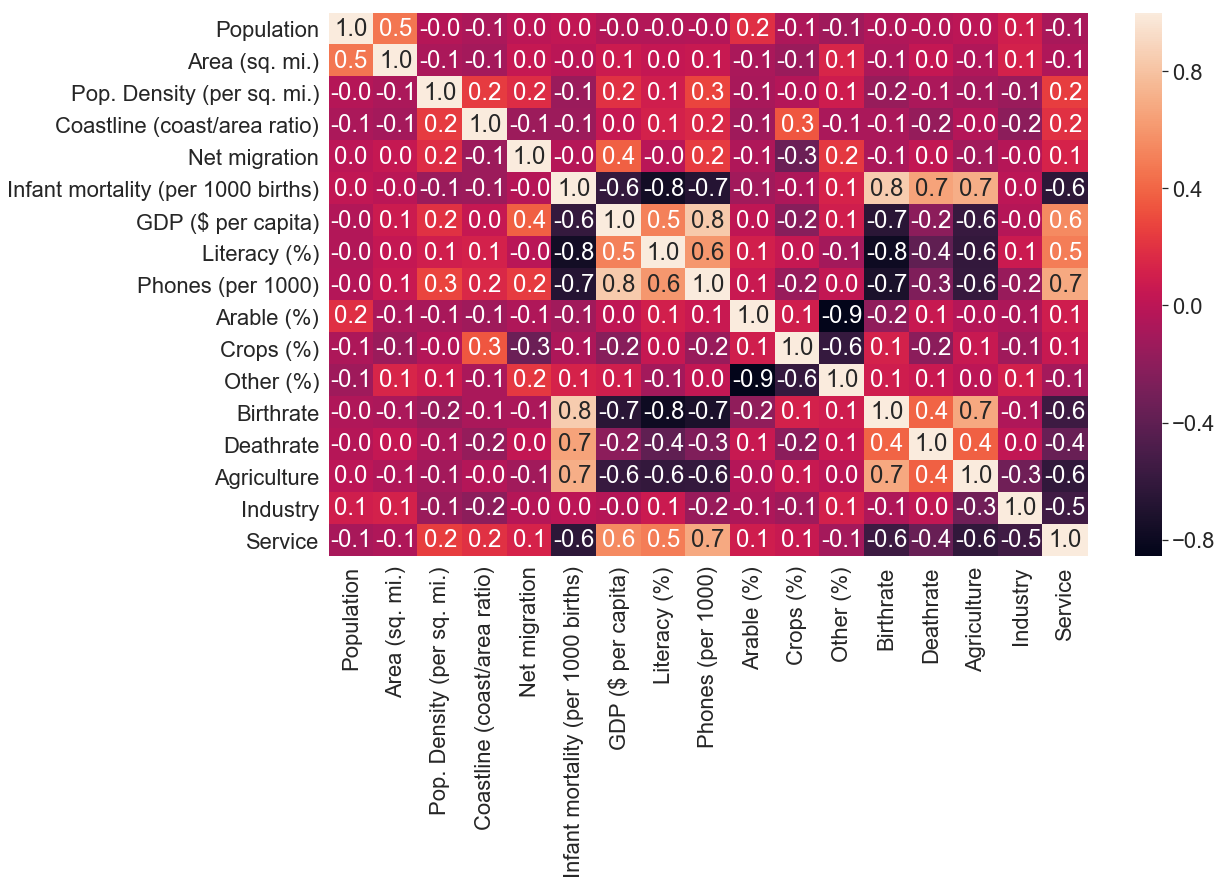

In [59]:
sns.heatmap(c_data.corr(),annot=True,fmt='.1f')
plt.show()

We call the corr() function on the dataframe to get a correlation of each column to each other column in the dataset and pass it to the heat map function. Then annotation to True so that each box of the matrix is given its corresponding value and set fmt to .1f which means that value is written with one decimal point.

#### Observation

Very interesting things here, let's first look at the bar on the right side, there are gradient colors ranging from -0.8 (black color) to 0.8 (yellow color). 

Now let's go to the matrix plot itself, we can observe a wide range of colors but most notably we can see a series of yellow cells that form a diagonal across the matrix, if you look closely at those cells you can see that the X and the Y axis is the same column that is why they are yellow which means that there is no correlation between the values in the same column because each value is compared with itself (that is also why those cells have a value of 1.0). 

The cells of the matrix separated by the series of yellow diagonal cells are the same just that they are symmetric to each other. This means that we can focus on one part and still come up with the same conclusion.

Focusing on the cells below the series of diagonal cells, there are cells that are darker than others, these show a high correlation between those two columns. For example, we can see that there is a high correlation between infant mortality and the GDP of a country.

To read more about heat map, read its documentation [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

#### pairplot

Now that we can have seen which columns (features) correlate to which, we can utilize the power of pair plotting to visualize these correlations using scatter plot on one figure.

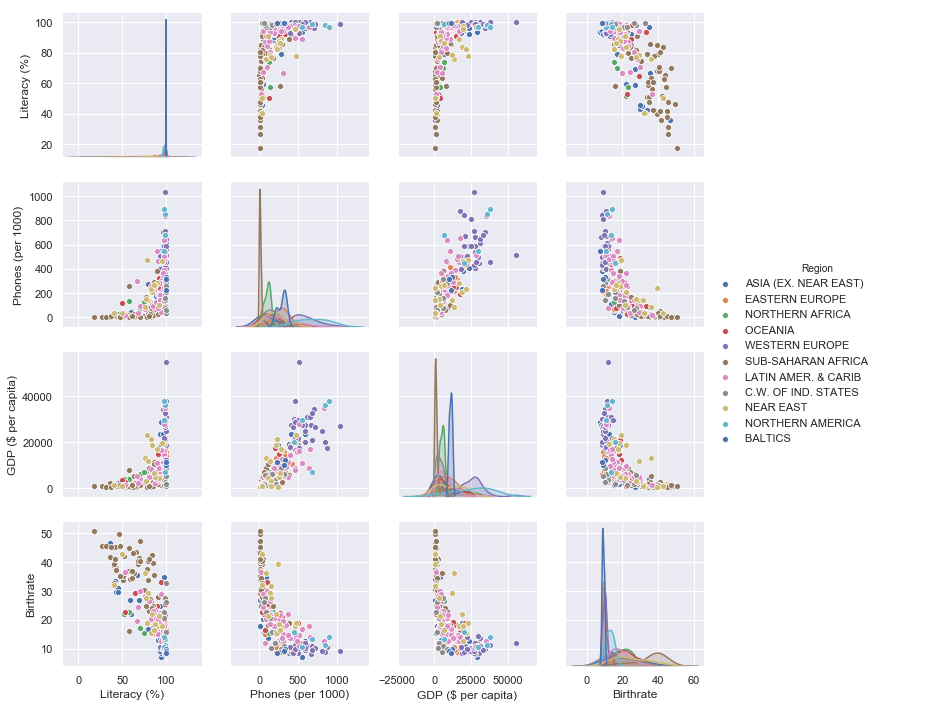

In [202]:
sns.set(font_scale=1)
sns.pairplot(c_data,hue="Region",vars=["Literacy (%)","Phones (per 1000)","GDP ($ per capita)","Birthrate"],palette="deep")
plt.show()

the first argument we pass to the pair plot function is the dataset, then set the hue to region so that a different color is given to each marker depending on its region, vars will be a list of the columns that we want to plot and finally set a palette.

#### Observation

We are using literacy, phones per 1000, GDP and birthrate since those have a correlation with each other and plot them in a two by two form (that is why it is called pair plot) where one column will be on the X axis and the other on the Y axis. Since we have 4 features, we'll have 6 possible combinations of plots.

As it was on the heat map, looking at the figure we can see distribution plots arranged diagonally separating this figure into two symmetric parts. These distribution plots have the same X and Y axis, for now, let's just ignore these to only focus on the scatter plots below the diagonal distribution plots.

Looking at the plot on the second row first column (the one with phones on the Y axis and literacy on the X axis), we can see that the markers from the same regions are located almost at the same location in the plot. For example, there is a lot of blue markers (looking at the legend these are countries from North America) around the same coordinates, suggesting that the population in this region is almost 100% literate with a high number of phones meanwhile at the bottom of the same plot we register a high number of brown markers (these are the countries from Sub-saharan Africa) suggesting that on average, people in this region don't have phones and that around 50% of them are literate. These grouping of markers show the correlation between features and the same thing can be observed on the other five plots.


Pair plot is very useful in EDA and you should take time and read more about it [here](https://seaborn.pydata.org/generated/seaborn.pairplot.html).

### Conclusion

Have you noticed how we have by now a good understanding of our dataset? Now you understand why every ML/data scientists should have basic data manipulation and visualization skills.

Exploratory data analysis is a whole field of study by its own. Seaborn, matplotlib, pandas and numpy are the most popular libraries for EDA in Python as of March 2019 and are quite easy to understand. There are many other libraries like Dash by plotly (based on the popular D3.js framework) or Bokeh that helps in the creation of interactive plots which are very fun to play with and give a whole new understanding of a dataset. I'll do a blog on one of the two in the near future.

There are many other libraries but as we said before in [this post](https://semasuka.github.io/blog/2018/12/18/what-are-the-requirements-for-ML.html), you don't need to be a master at every library (no one is actually) you only need a basic understanding of the libraries you want to work with and then learn them well as you time goes on. Remember programming languages, libraries or frameworks are just tools to help us solve a problem this means that solving the problem is our priority no matter the tools used.

Lastly, you should choose the tool(s) to use based on:

* The type of project
* The type of dataset you are working with (for example it should not be appropriate to use pandas if you are working with big data)
* How important it is to communicate the findings from a dataset to non-technical persons

I know this post was kinda long but because it's essential to have a good basic foundation of EDA, we had to emphasize on it.

Thank you for reading this tutorial. Hope you have learned one or two things. If you like this post, please subscribe to stay updated with new posts and if you have a thought or a question, I would love to hear it by commenting below.